In [3]:
# Qiskit
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
from qiskit_ibm_provider import IBMProvider
#from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit import Aer, assemble
from qiskit import IBMQ, execute
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService #, Sampler, Estimator, Session, Options
from qiskit_optimization import QuadraticProgram
from qiskit.utils import algorithm_globals
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit.primitives import Sampler

# Loading your IBM Quantum account(s)
#service = QiskitRuntimeService(channel="ibm_quantum")

from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import Maxcut
from qiskit_optimization.problems import QuadraticProgram
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import Tsp
from qiskit_ibm_runtime import Sampler as SamplerRT
from qiskit_ibm_runtime import Session
from qiskit.algorithms.optimizers import COBYLA

# Grafos

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from itertools import combinations
from sklearn.cluster import KMeans

#Solver
from qiskit import Aer, IBMQ
from qiskit.utils import QuantumInstance
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.algorithms.minimum_eigensolvers import QAOA
#from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization import QuadraticProgram
from qiskit.algorithms.optimizers import COBYLA

/tmp/ipykernel_952/2524890704.py:23: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SPSA


In [4]:
def Generar_Grafo(Coord,high,low):
    pos = {i: (coord_[0], coord_[1]) for i, coord_ in enumerate(Coord)}
    graph = nx.random_geometric_graph(len(Coord[:,0]), np.hypot(high - low, high - low) + 1, pos=pos)
    for w, v in graph.edges:
        delta = [graph.nodes[w]["pos"][i] - graph.nodes[v]["pos"][i] for i in range(2)]
        graph.edges[w, v]["weight"] = np.rint(np.hypot(delta[0], delta[1]))
    return graph,pos

def generate_coordinate_matrices(Num_Nodos, Limites_x, Limites_y, K):
    # Generar coordenadas aleatorias de nodos
    x_coord = np.random.uniform(Limites_x[0], Limites_x[-1], Num_Nodos)
    y_coord = np.random.uniform(Limites_y[0], Limites_y[-1], Num_Nodos)

    Distancia_Centro = np.sqrt((np.mean(x_coord) - x_coord) ** 2 + (np.mean(y_coord) - y_coord) ** 2)
    Indice_min = np.argmin(Distancia_Centro)

    Warehouse = np.array([x_coord[Indice_min], y_coord[Indice_min]])

    x_coord = np.delete(x_coord, Indice_min)
    y_coord = np.delete(y_coord, Indice_min)

    # Calcular el centro de los clusters utilizando K-means
    coordinates = np.array(list(zip(x_coord, y_coord)))
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(coordinates)
    cluster_labels = kmeans.labels_

    # Inicializar una lista de matrices de coordenadas para cada cluster
    coordinate_matrices = [np.vstack((Warehouse, coordinates[cluster_labels == i])) for i in range(K)]

    return coordinate_matrices

def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]['weight'])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G2, node_color=colors, edge_color='b', node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos, font_color='b', edge_labels=edge_labels)

In [20]:
Num_Nodos = 7
Limites_x = (-10, 10)
Limites_y = (-10, 10)
Camiones = 2  # Número de clusters para K-means

# Generar las matrices de coordenadas para los camiones
coordinate_matrices = generate_coordinate_matrices(Num_Nodos, Limites_x, Limites_y, Camiones)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


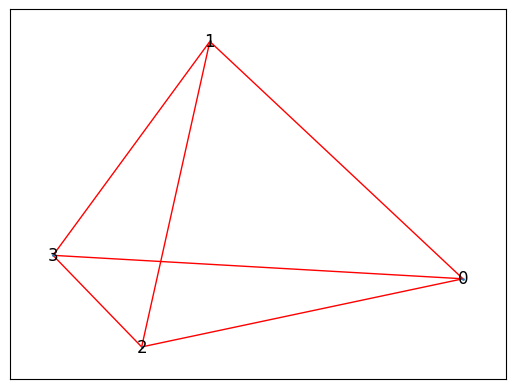

Problem name: TSP

Minimize
  8*x_0_0*x_1_1 + 8*x_0_0*x_1_3 + 5*x_0_0*x_2_1 + 5*x_0_0*x_2_3 + 6*x_0_0*x_3_1
  + 6*x_0_0*x_3_3 + 8*x_0_1*x_1_0 + 8*x_0_1*x_1_2 + 5*x_0_1*x_2_0
  + 5*x_0_1*x_2_2 + 6*x_0_1*x_3_0 + 6*x_0_1*x_3_2 + 8*x_0_2*x_1_1
  + 8*x_0_2*x_1_3 + 5*x_0_2*x_2_1 + 5*x_0_2*x_2_3 + 6*x_0_2*x_3_1
  + 6*x_0_2*x_3_3 + 8*x_0_3*x_1_0 + 8*x_0_3*x_1_2 + 5*x_0_3*x_2_0
  + 5*x_0_3*x_2_2 + 6*x_0_3*x_3_0 + 6*x_0_3*x_3_2 + 10*x_1_0*x_2_1
  + 10*x_1_0*x_2_3 + 7*x_1_0*x_3_1 + 7*x_1_0*x_3_3 + 10*x_1_1*x_2_0
  + 10*x_1_1*x_2_2 + 7*x_1_1*x_3_0 + 7*x_1_1*x_3_2 + 10*x_1_2*x_2_1
  + 10*x_1_2*x_2_3 + 7*x_1_2*x_3_1 + 7*x_1_2*x_3_3 + 10*x_1_3*x_2_0
  + 10*x_1_3*x_2_2 + 7*x_1_3*x_3_0 + 7*x_1_3*x_3_2 + 3*x_2_0*x_3_1
  + 3*x_2_0*x_3_3 + 3*x_2_1*x_3_0 + 3*x_2_1*x_3_2 + 3*x_2_2*x_3_1
  + 3*x_2_2*x_3_3 + 3*x_2_3*x_3_0 + 3*x_2_3*x_3_2

Subject to
  Linear constraints (8)
    x_0_0 + x_0_1 + x_0_2 + x_0_3 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 + x_1_3 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 + x_2_3 == 1  'c2'
  

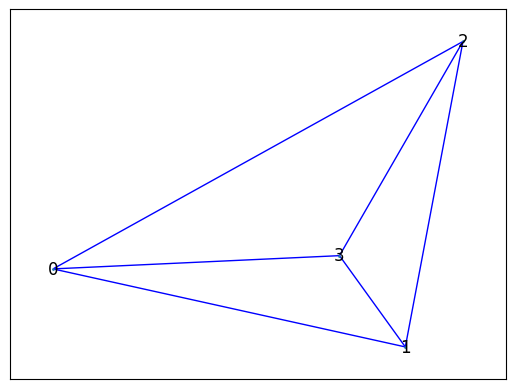

Problem name: TSP

Minimize
  7*x_0_0*x_1_1 + 7*x_0_0*x_1_3 + 10*x_0_0*x_2_1 + 10*x_0_0*x_2_3
  + 6*x_0_0*x_3_1 + 6*x_0_0*x_3_3 + 7*x_0_1*x_1_0 + 7*x_0_1*x_1_2
  + 10*x_0_1*x_2_0 + 10*x_0_1*x_2_2 + 6*x_0_1*x_3_0 + 6*x_0_1*x_3_2
  + 7*x_0_2*x_1_1 + 7*x_0_2*x_1_3 + 10*x_0_2*x_2_1 + 10*x_0_2*x_2_3
  + 6*x_0_2*x_3_1 + 6*x_0_2*x_3_3 + 7*x_0_3*x_1_0 + 7*x_0_3*x_1_2
  + 10*x_0_3*x_2_0 + 10*x_0_3*x_2_2 + 6*x_0_3*x_3_0 + 6*x_0_3*x_3_2
  + 8*x_1_0*x_2_1 + 8*x_1_0*x_2_3 + 3*x_1_0*x_3_1 + 3*x_1_0*x_3_3
  + 8*x_1_1*x_2_0 + 8*x_1_1*x_2_2 + 3*x_1_1*x_3_0 + 3*x_1_1*x_3_2
  + 8*x_1_2*x_2_1 + 8*x_1_2*x_2_3 + 3*x_1_2*x_3_1 + 3*x_1_2*x_3_3
  + 8*x_1_3*x_2_0 + 8*x_1_3*x_2_2 + 3*x_1_3*x_3_0 + 3*x_1_3*x_3_2
  + 6*x_2_0*x_3_1 + 6*x_2_0*x_3_3 + 6*x_2_1*x_3_0 + 6*x_2_1*x_3_2
  + 6*x_2_2*x_3_1 + 6*x_2_2*x_3_3 + 6*x_2_3*x_3_0 + 6*x_2_3*x_3_2

Subject to
  Linear constraints (8)
    x_0_0 + x_0_1 + x_0_2 + x_0_3 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 + x_1_3 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 + x_2_3 == 1  'c2'
  

In [21]:
grafo1,pos1=Generar_Grafo(coordinate_matrices[0],10,-10)
tsp1= Tsp(grafo1)
nx.draw_networkx(grafo1,pos1,edge_color="red",node_size=1,width=1)
colors1 = ['r' for node in tsp1.graph.nodes]
adj_matrix1 = nx.to_numpy_array(tsp1.graph)
plt.show()
qp1 = tsp1.to_quadratic_program()
print(qp1.prettyprint())

grafo2,pos2=Generar_Grafo(coordinate_matrices[1],10,-10)
tsp2= Tsp(grafo2)
nx.draw_networkx(grafo2,pos2,edge_color="blue",node_size=1,width=1)
colors2 = ['r' for node in tsp2.graph.nodes]
adj_matrix2 = nx.to_numpy_array(tsp2.graph)
plt.show()
qp2 = tsp2.to_quadratic_program()
print(qp2.prettyprint())

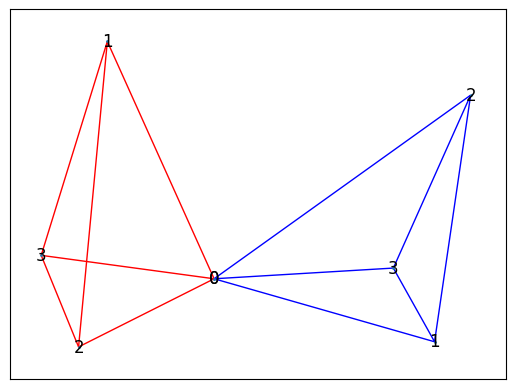

In [22]:
nx.draw_networkx(grafo1,pos1,edge_color="red",node_size=1,width=1)
nx.draw_networkx(grafo2,pos2,edge_color="blue",node_size=1,width=1)
plt.show()

In [23]:
#quantum_instance = QuantumInstance(backend, shots=1000, seed_simulator=10598, seed_transpiler=10598)
#qaoa_mes = QAOA(quantum_instance=quantum_instance)
from qiskit.primitives import Sampler

qaoa_mes = qiskit.algorithms.minimum_eigensolvers.QAOA(sampler=Sampler(),optimizer=COBYLA(maxiter=100))
optimizer = MinimumEigenOptimizer(qaoa_mes)

# Resolver el problema para cada grafo
result1 = optimizer.solve(qp1)
print("Resultado del primer grafo:", result1)

result2 = optimizer.solve(qp2)
print("Resultado del segundo grafo:", result2)

Resultado del primer grafo: fval=23.0, x_0_0=0.0, x_0_1=0.0, x_0_2=1.0, x_0_3=0.0, x_1_0=0.0, x_1_1=0.0, x_1_2=0.0, x_1_3=1.0, x_2_0=0.0, x_2_1=1.0, x_2_2=0.0, x_2_3=0.0, x_3_0=1.0, x_3_1=0.0, x_3_2=0.0, x_3_3=0.0, status=SUCCESS
Resultado del segundo grafo: fval=26.0, x_0_0=0.0, x_0_1=0.0, x_0_2=1.0, x_0_3=0.0, x_1_0=0.0, x_1_1=0.0, x_1_2=0.0, x_1_3=1.0, x_2_0=0.0, x_2_1=1.0, x_2_2=0.0, x_2_3=0.0, x_3_0=1.0, x_3_1=0.0, x_3_2=0.0, x_3_3=0.0, status=SUCCESS


In [24]:
z1 = tsp1.interpret(result1.x)
print('solution:', z1)
print('solution objective:', tsp1.tsp_value(z1, adj_matrix1))

solution: [3, 2, 0, 1]
solution objective: 23.0


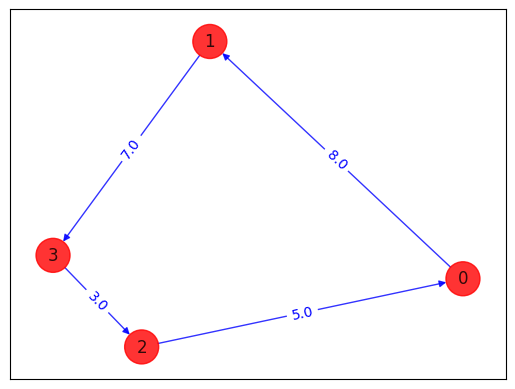

In [25]:
draw_tsp_solution(tsp1.graph, z1, colors1, pos1)

In [26]:
z2 = tsp1.interpret(result2.x)
print('solution:', z2)
print('solution objective:', tsp2.tsp_value(z2, adj_matrix2))

solution: [3, 2, 0, 1]
solution objective: 26.0


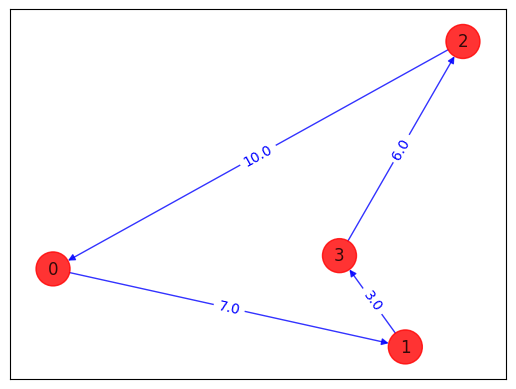

In [27]:
draw_tsp_solution(tsp2.graph, z2, colors2, pos2)